In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', title='03-FeaturesOther_pn', normalize=True, logger=display)
analysis.load_data()

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the features and predictor to just be the avg temperature value.

In [2]:
predictor = 'actual_mean_temp'
features = ['actual_min_temp', 'actual_max_temp', 'actual_precipitation', predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

# Raw Data

Raw Data means that the model simply takes the data as a sequence and no data manipulation is performed.

## ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1815.763, BIC=1848.823, Fit time=3.180 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1952.822, BIC=1982.208, Fit time=2.408 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1823.482, BIC=1852.869, Fit time=2.803 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1816.509, BIC=1853.243, Fit time=3.659 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1979.223, BIC=2008.610, Fit time=0.952 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1819.049, BIC=1859.455, Fit time=7.131 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1810.123, BIC=1846.856, Fit time=3.236 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 

'Train Error (RMSE): 7.696998140070051  Num NaN: 0'

'Test Error (RMSE): 8.304869106313697    Num NaN: 0'

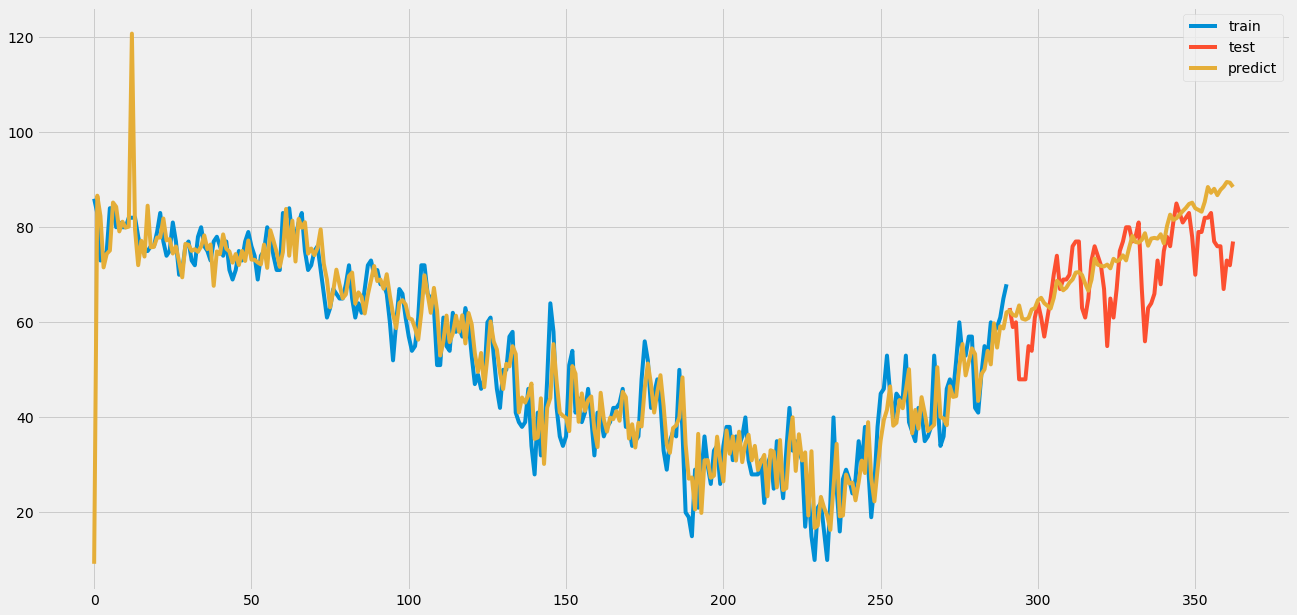

In [4]:
model = ARIMA(analysis=analysis, use_features=True)
analysis.run_model(model, name='ARIMA')

'Train Error (RMSE): 5.371030860886117  Num NaN: 0'

'Test Error (RMSE): 6.341266960684329    Num NaN: 0'

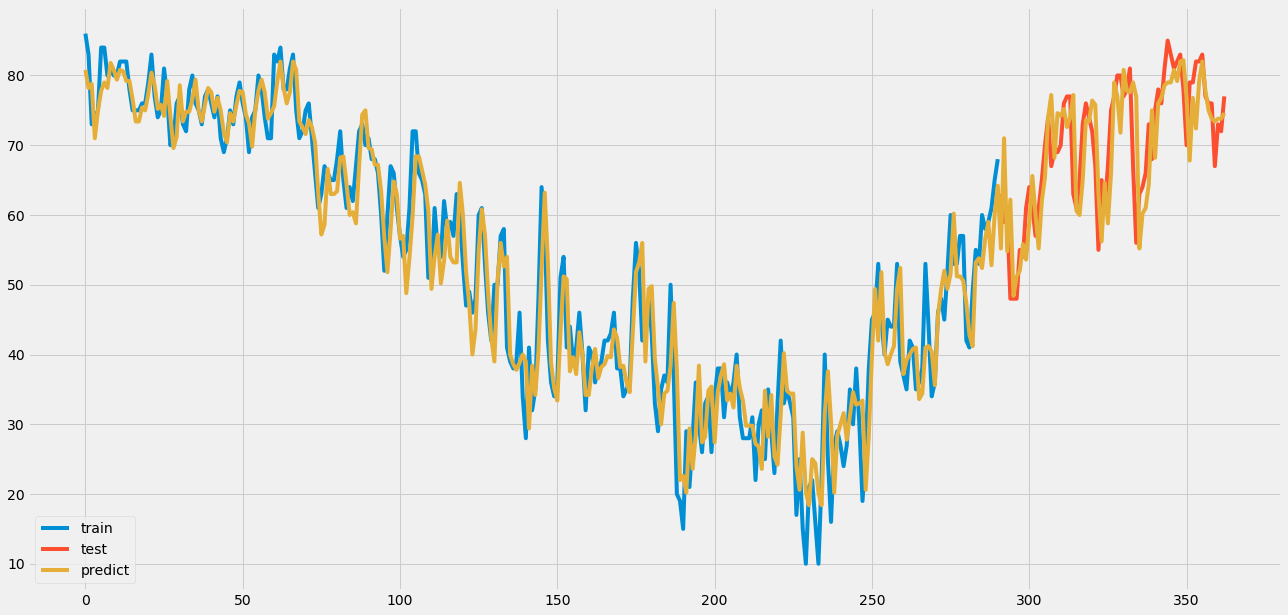

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis=analysis, regressor=KNeighborsRegressor)
analysis.run_model(model, name='KNN')

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error (RMSE): 7.6872089181760135  Num NaN: 0'

'Test Error (RMSE): 6.8996184672695815    Num NaN: 0'

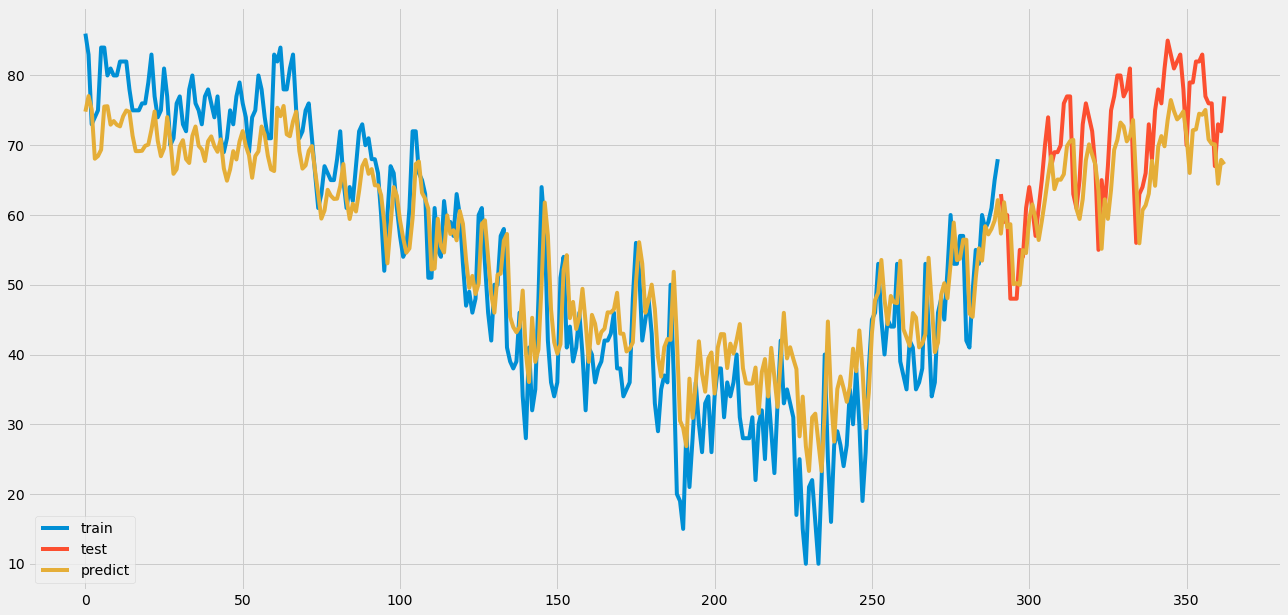

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis=analysis, regressor=SGDRegressor)
analysis.run_model(model, name='SGD')

'Train Error (RMSE): 2.9715280082314055  Num NaN: 0'

'Test Error (RMSE): 6.06971171544761    Num NaN: 0'

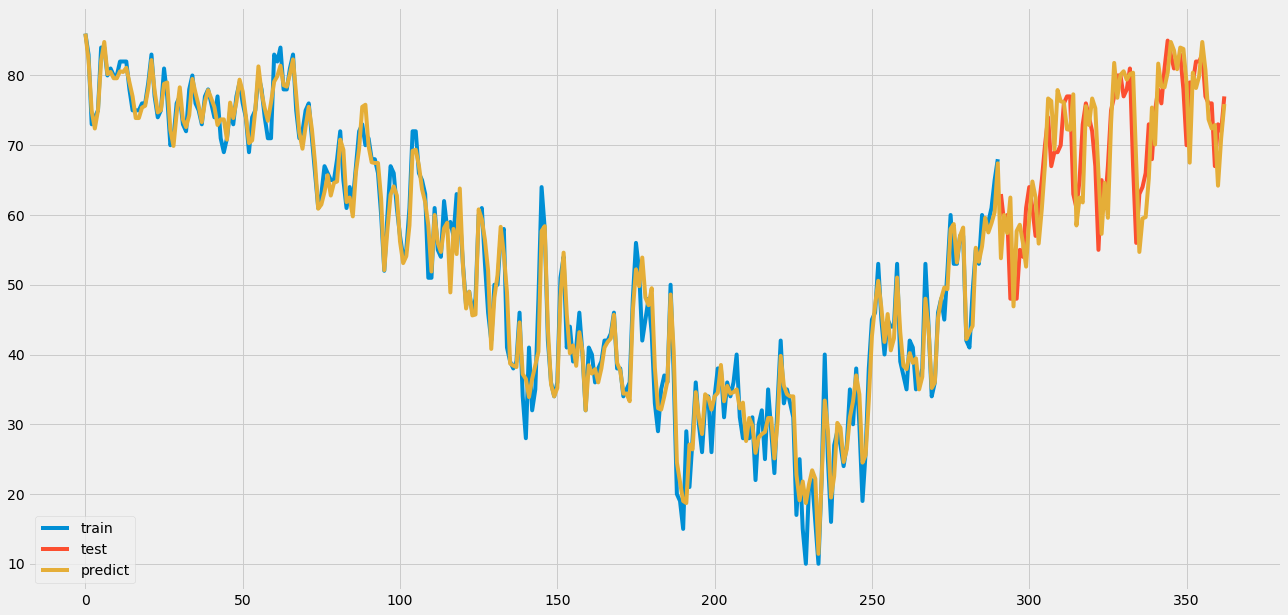

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis=analysis, regressor=RandomForestRegressor)
analysis.run_model(model, name='RandomForest')

'Train Error (RMSE): 5.602139478581147  Num NaN: 0'

'Test Error (RMSE): 6.1298570659303975    Num NaN: 0'

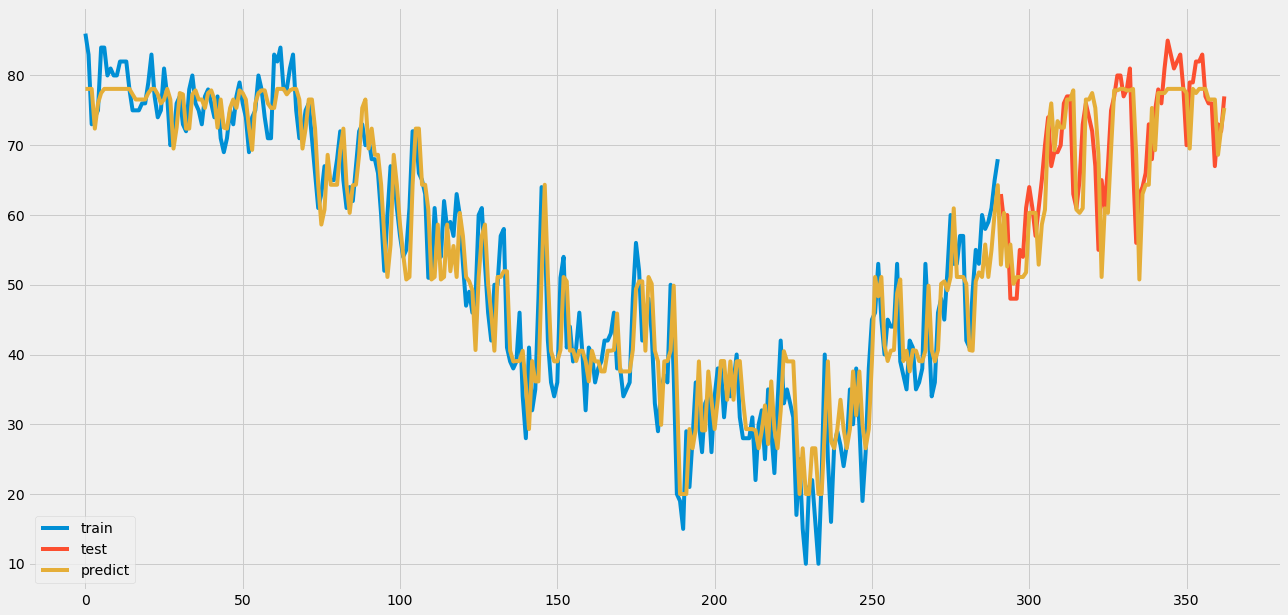

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis=analysis, regressor=AdaBoostRegressor)
analysis.run_model(model, name='AdaBoost')

'Train Error (RMSE): 4.634468639712515  Num NaN: 0'

'Test Error (RMSE): 86.09596078188696    Num NaN: 0'

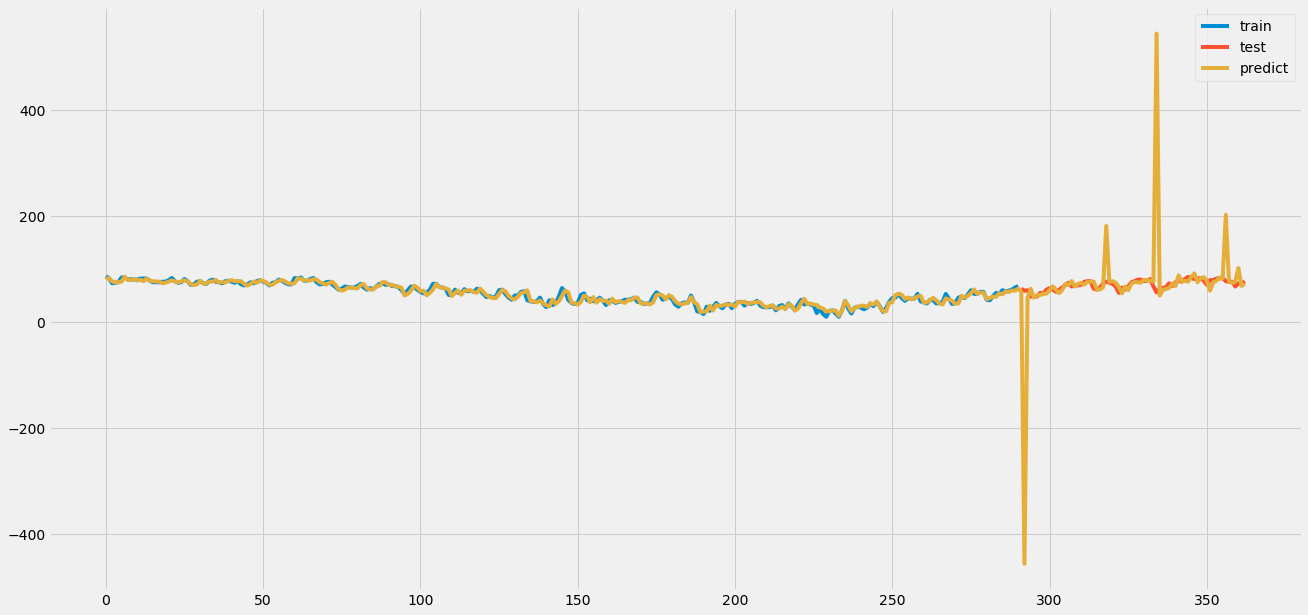

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis=analysis, regressor=GaussianProcessRegressor)
analysis.run_model(model, name='GaussianProcess')

## Recurrent Neural Network Complete Sequence

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

Using TensorFlow backend.
D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


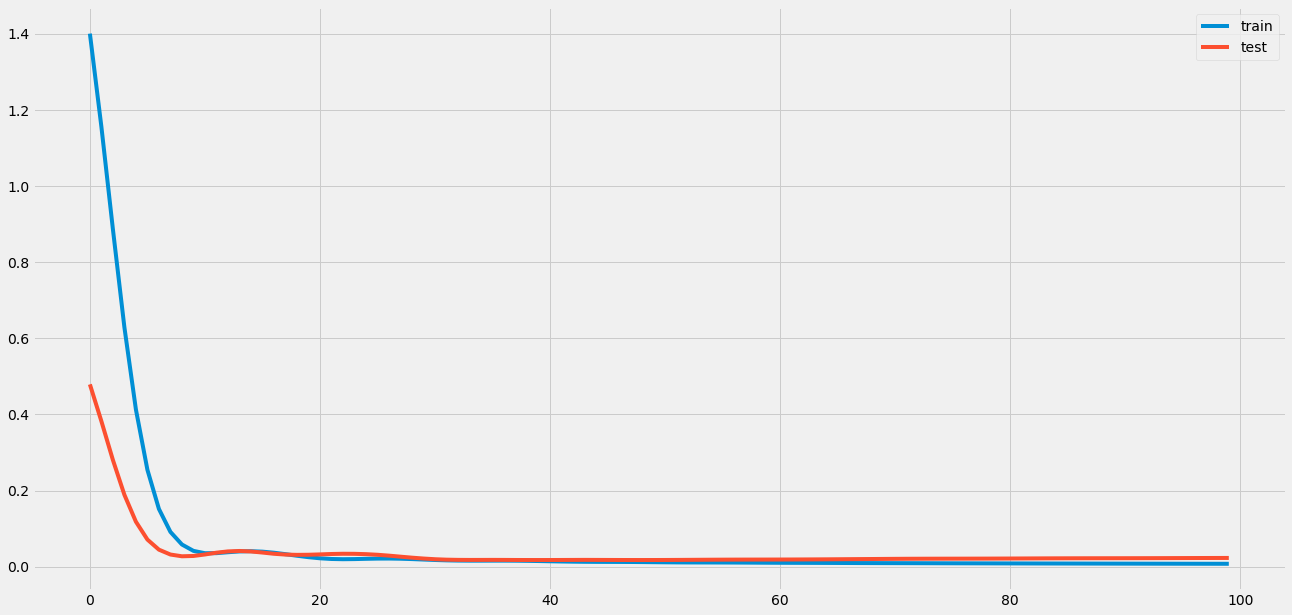

'Train Error (RMSE): 7.5823237155539385  Num NaN: 0'

'Test Error (RMSE): 9.610588636022012    Num NaN: 0'

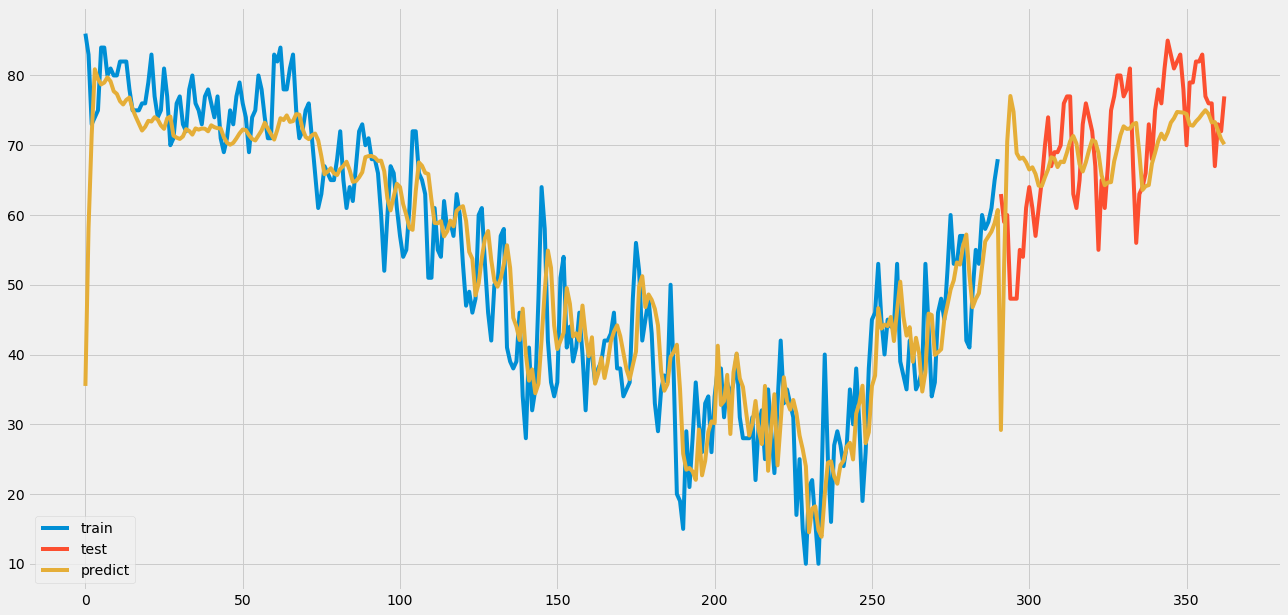

In [10]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='RNNAll')

## Recurrent Neural Network Complete Sequence (LSTM)

Complete sequence means that the entire sequence is input into the network and each timestep produces an output.  There are no batches, just one long sequence.

D:\Users\fjd10\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


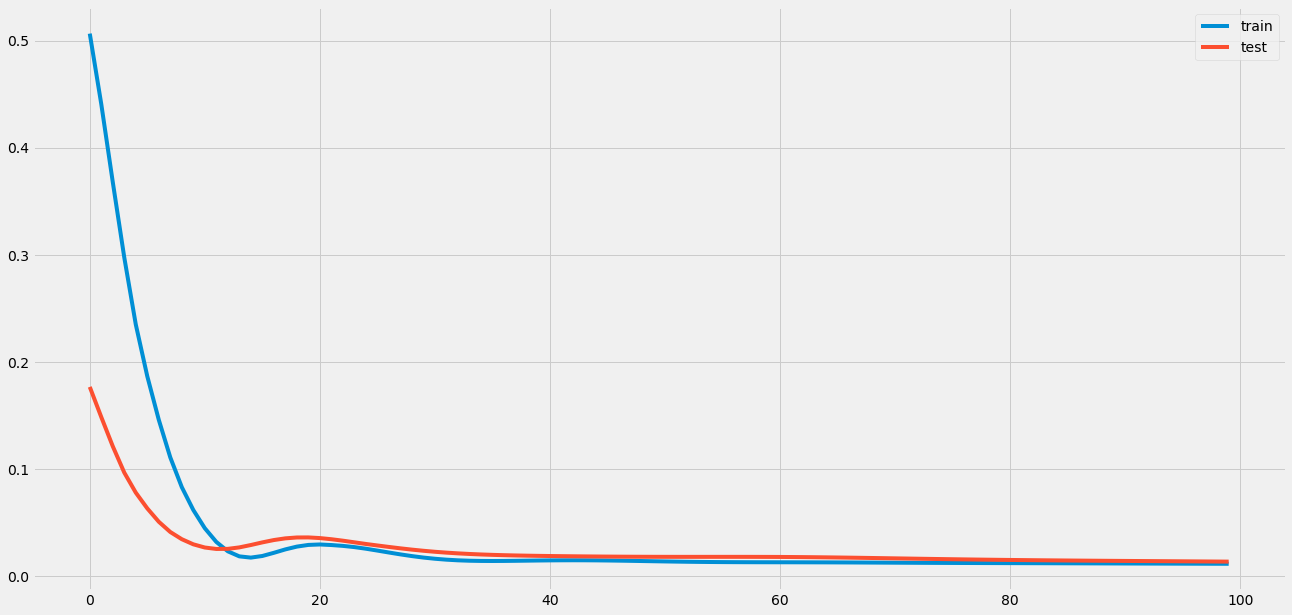

'Train Error (RMSE): 9.214700545882632  Num NaN: 0'

'Test Error (RMSE): 10.22196444930366    Num NaN: 0'

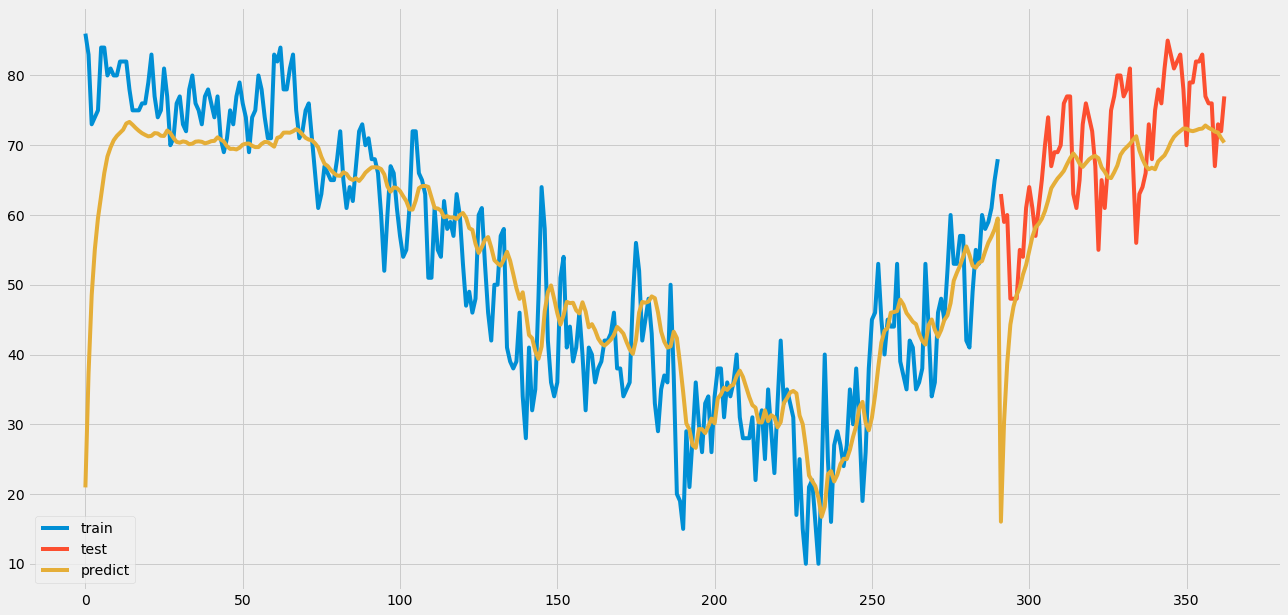

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNAll(analysis=analysis, model=nn, fit_config={'epochs': 100, 'shuffle': False})
analysis.run_model(model, name='LSTMAll')

# Chunking Data

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



## LinearRegression

'Train Error (RMSE): 5.473409004491406  Num NaN: 4'

'Test Error (RMSE): 5.525527869139471    Num NaN: 4'

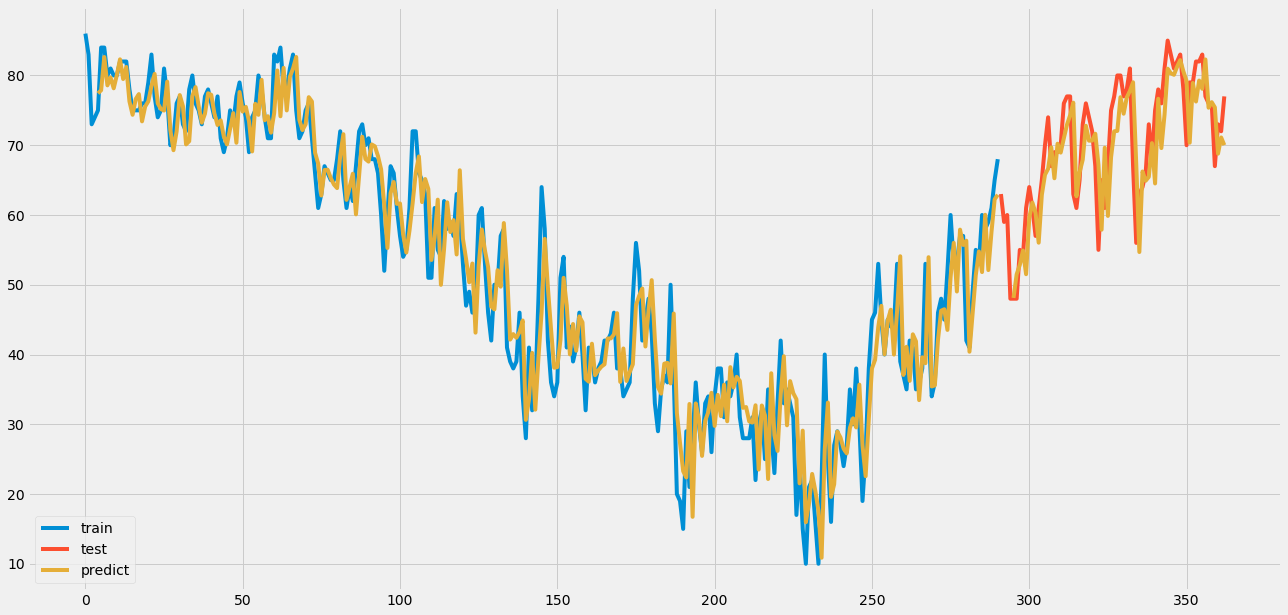

In [12]:
model = LinearRegression(analysis=analysis, num_days=NUM_DAYS)
analysis.run_model(model, name='LinearRegression')

## FeedForward Neural Network

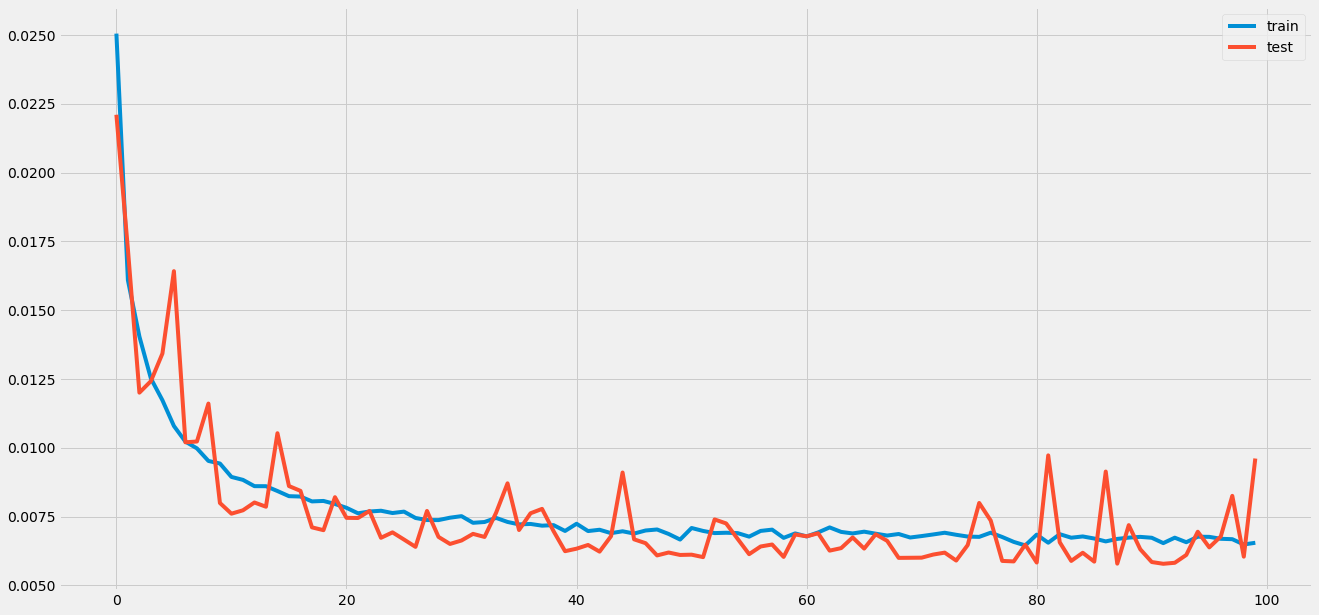

'Train Error (RMSE): 7.472770628257044  Num NaN: 4'

'Test Error (RMSE): 7.352504178303808    Num NaN: 4'

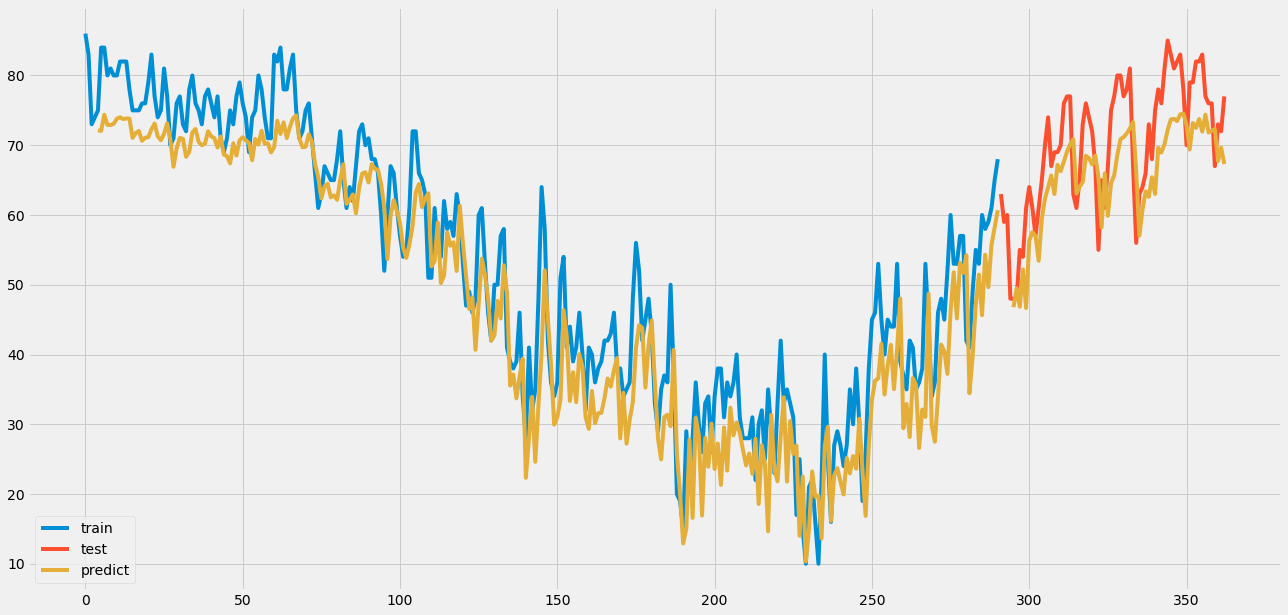

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mse', optimizer='sgd')

model = FNN(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='FNN')


## Recurrent Neural Network with Single Output

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

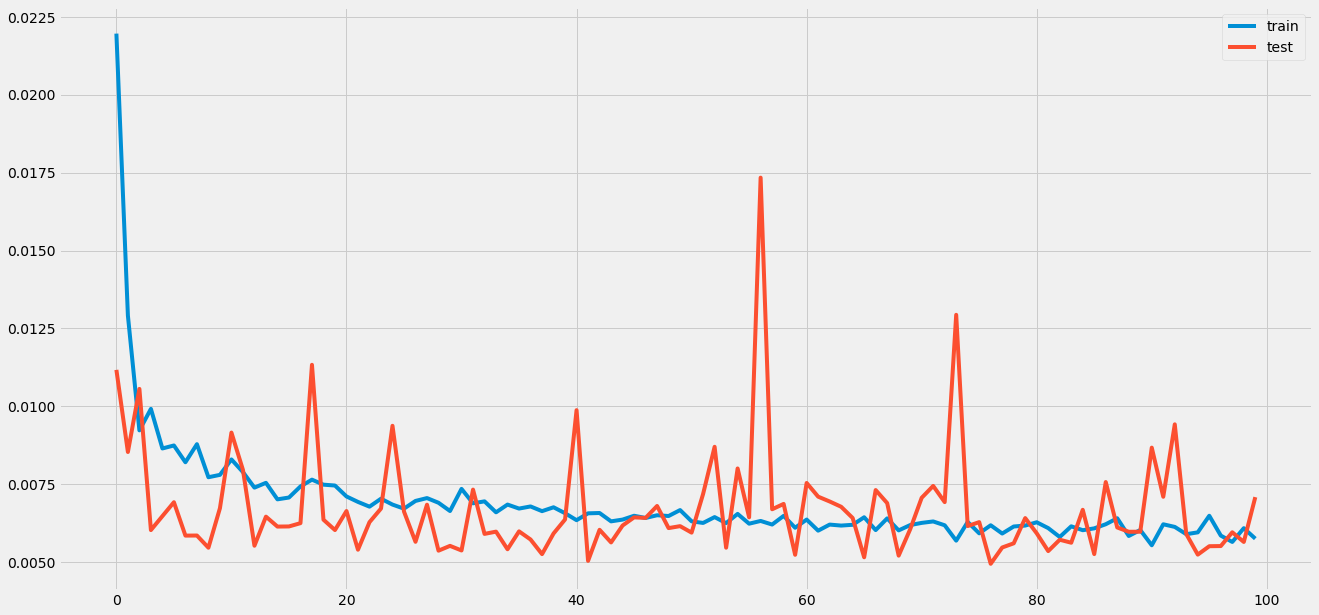

'Train Error (RMSE): 5.60856760429769  Num NaN: 4'

'Test Error (RMSE): 6.3123052772724755    Num NaN: 4'

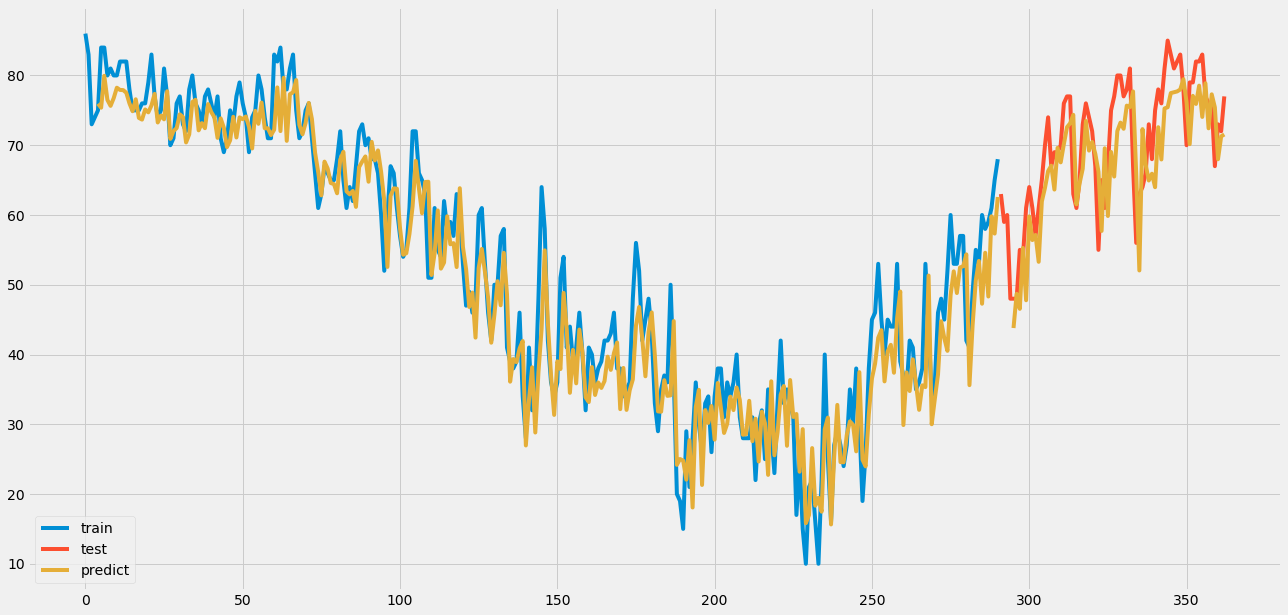

In [14]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNSingle')

## Recurrent Neural Network with Multiple Outputs

Multiple outputs means that the chunked data is input and the output at each timestep is used.

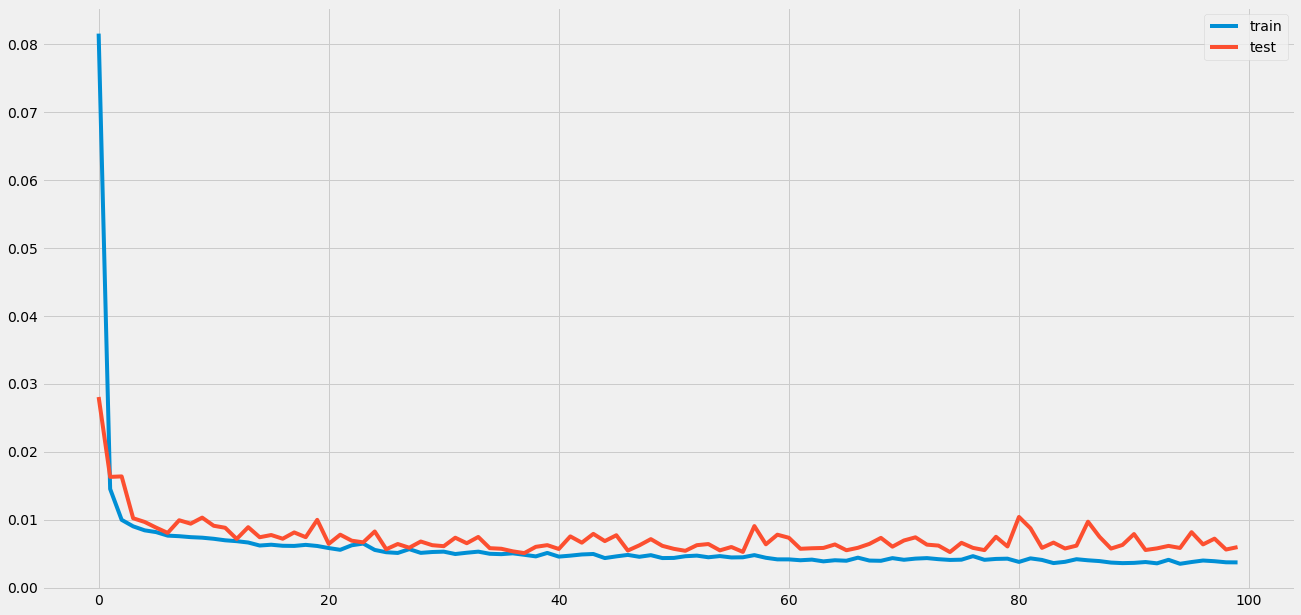

'Train Error (RMSE): 4.8526060424498425  Num NaN: 0'

'Test Error (RMSE): 6.303429123128205    Num NaN: 0'

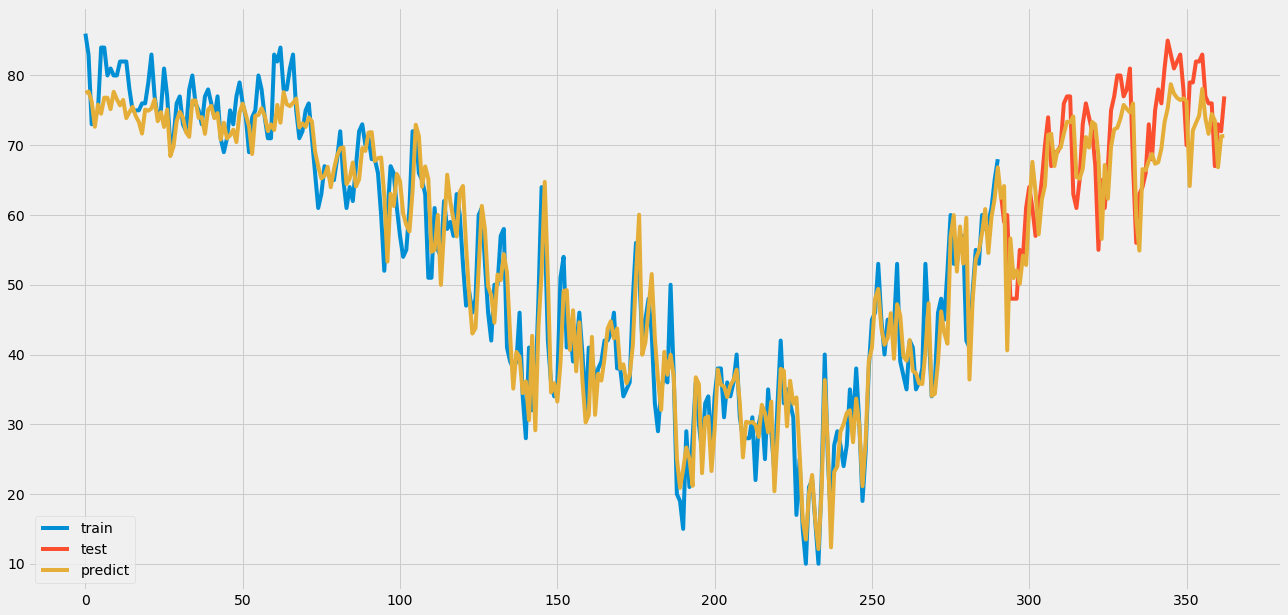

In [15]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.SimpleRNN(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='RNNMultiple')

## Recurrent Neural Network with Single Output (LSTM)

Single output means that the chunked timesteps are input and then the final output of the RNN is used as the prediction.

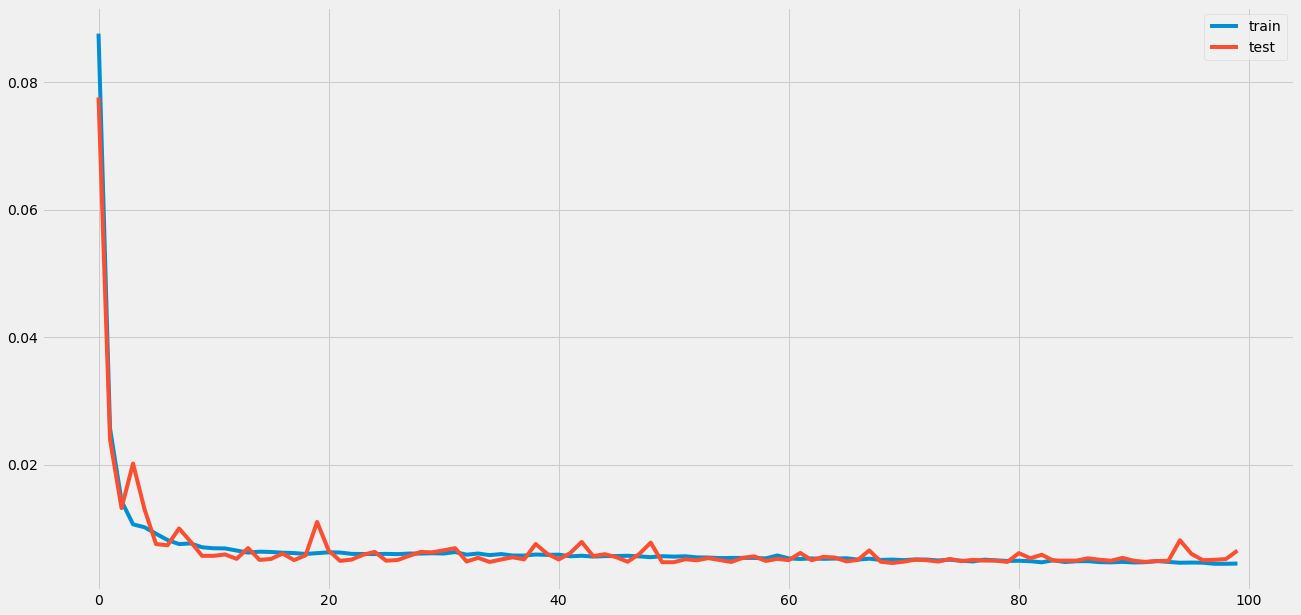

'Train Error (RMSE): 4.971089373009161  Num NaN: 4'

'Test Error (RMSE): 6.072920283910943    Num NaN: 4'

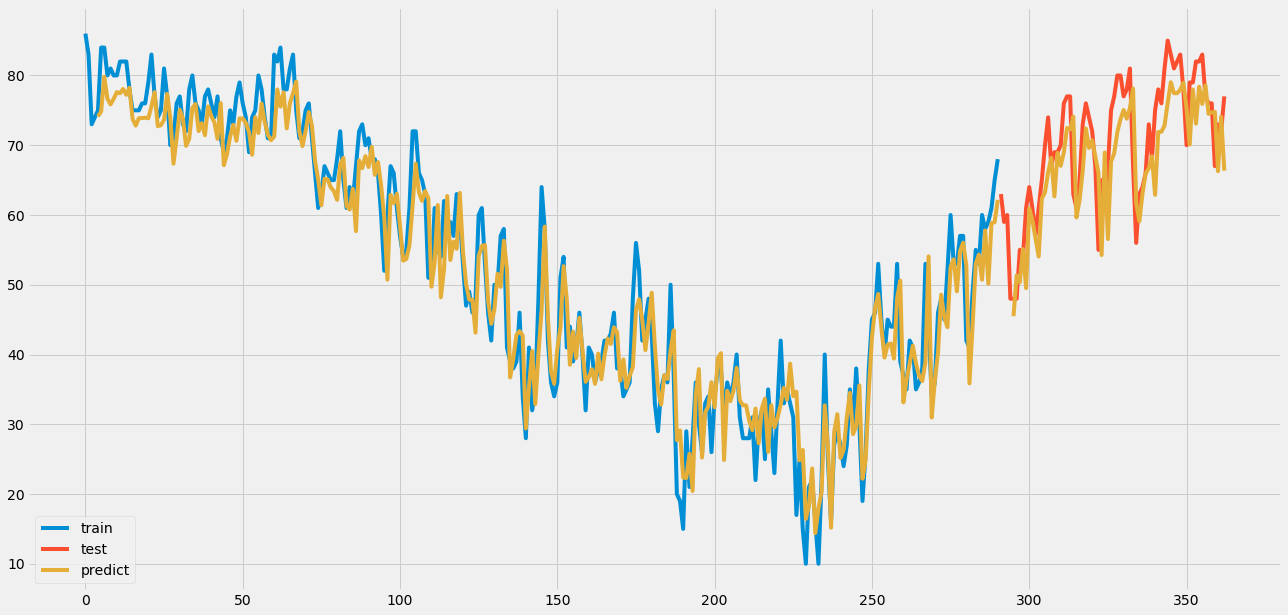

In [16]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mse', optimizer='adam')
        
model = RNNSingle(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMSingle')

## Recurrent Neural Network with Multiple Outputs (LSTM)

Multiple outputs means that the chunked data is input and the output at each timestep is used.

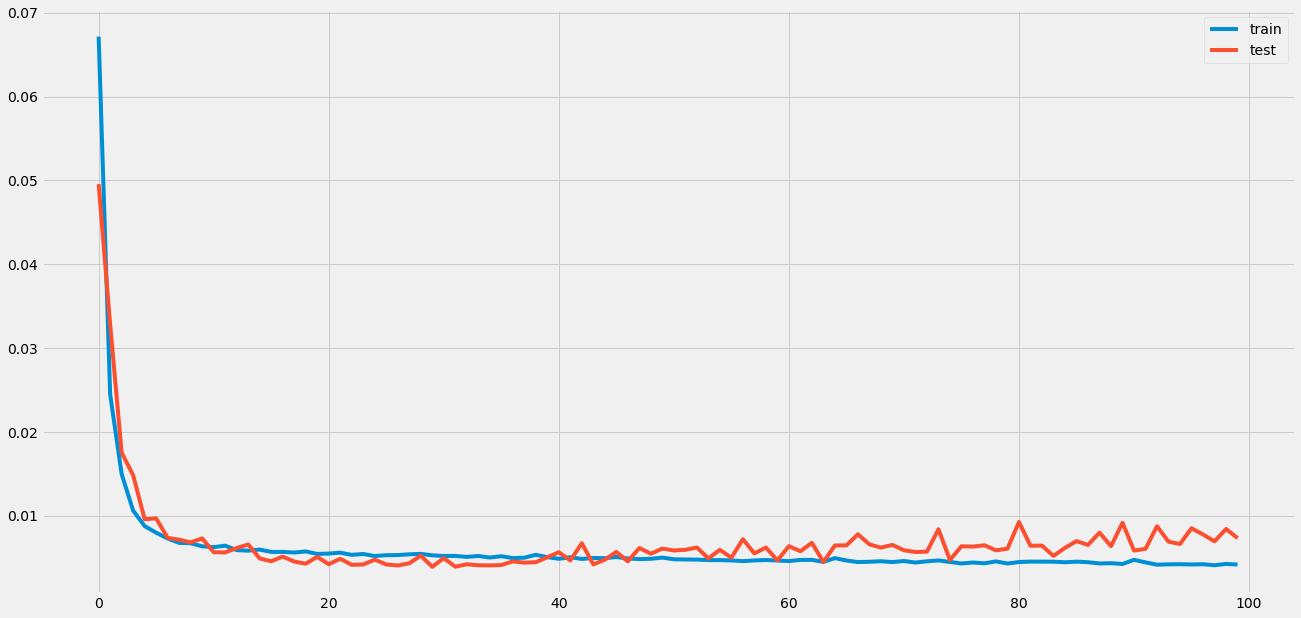

'Train Error (RMSE): 5.670276160333439  Num NaN: 0'

'Test Error (RMSE): 6.03911498595688    Num NaN: 0'

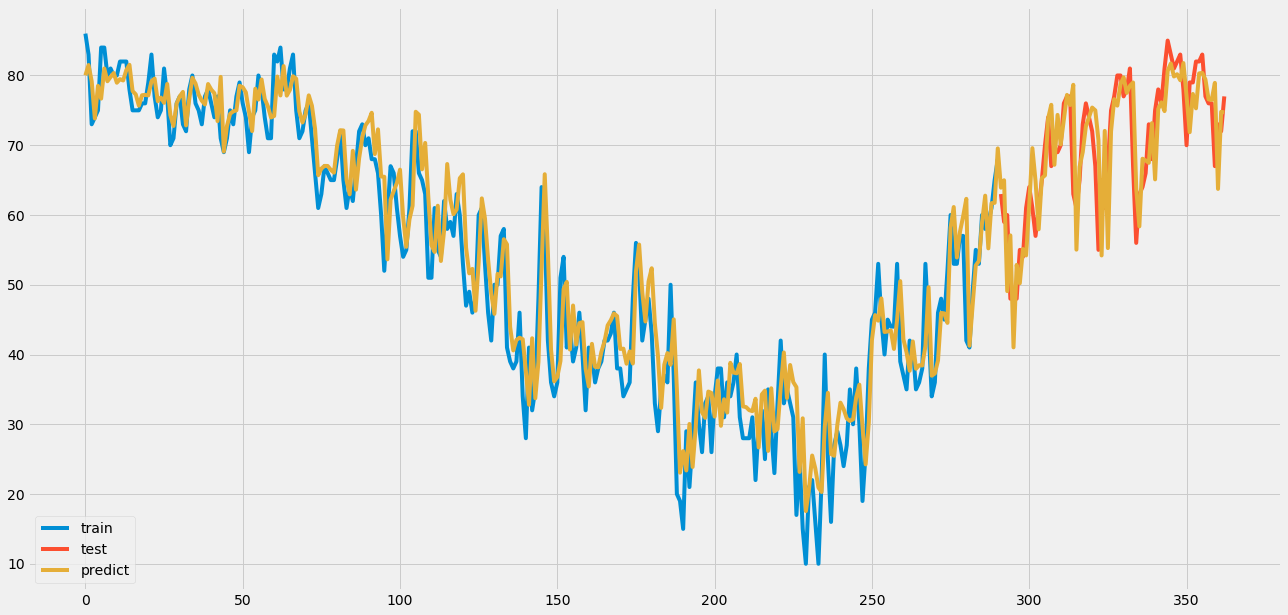

In [17]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mse', optimizer='adam')

model = RNNMultiple(analysis=analysis, model=nn, num_days=NUM_DAYS)
analysis.run_model(model, name='LSTMMultiple')